In [1]:
# packages for data analysis
import numpy as np
import pandas as pd
from sklearn import svm

# visual your data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [6]:
recipes = pd.read_csv('cupcake_muffin.csv')
print(recipes.head())

     type  four  milk  sugar  butter  egg  baking p  vanilla  salt
0  muffin    55    28      3       7    5         2        0     0
1  muffin    47    24     12       6    9         1        0     0
2  muffin    47    23     18       6    4         1        0     0
3  muffin    45    11     17      17    8         1        0     0
4  muffin    50    25     12       6    5         2        1     0


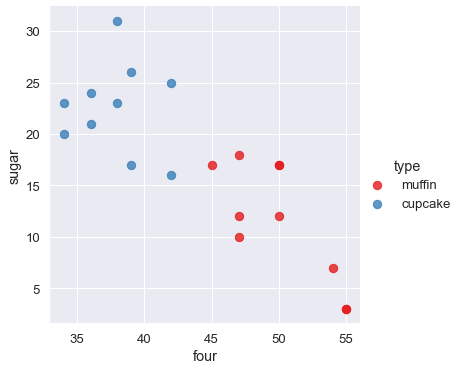

In [8]:
# plot our data

sns.lmplot('four', 'sugar', data=recipes, hue='type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [12]:
# format or pre process our data

type_label = np.where(recipes['type']=='muffin', 0,1)
recipe_features = recipes.columns.values[1:].tolist()
recipe_features
ingredients = recipes [['four', 'sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [13]:
# fit model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [15]:
# get the seporating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]) / w[1]


# plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

C:\Users\Jtmen\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


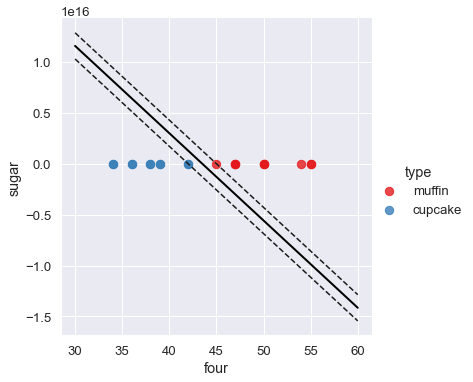

In [20]:
sns.lmplot('four', 'sugar', data=recipes, hue='type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [25]:
# create function to predict muffin or cupcake
def muffin_or_cupcake(four, sugar):
    if(model.predict([[four, sugar]]))==0:
        print ('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')
        
# predcit if 50 parts flour and 20 parts sugar
muffin_or_cupcake(40, 20)

You're looking at a cupcake recipe!


C:\Users\Jtmen\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


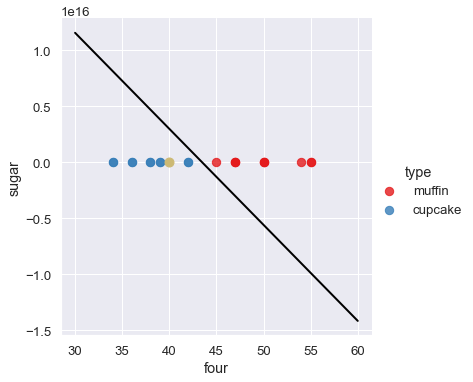

In [26]:
# let's plot this on the graph
sns.lmplot('four', 'sugar', data=recipes, hue='type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(40,20,'yo', markersize='9')